In this file we plot the HC1 signal and look at its frequency contents

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import butter, lfilter, filtfilt, freqz
from pathlib import Path
import sys
sys.path.append("C:/Users/ariaa/OneDrive - NTNU/Masteroppgave/Code & Data")
from src.data.matToNpy import matToNpy

filename = 'hc1_d533101_extracellular'
matlab = True
fs = 10_000
n_bits = 11 # 11 because of 2's compliment
M = 50_000#100_000 # Num samples (this is 10s)

if matlab == True: 
    s = matToNpy(filename)[:M,:] # <------------------------
else:
    base_folder = Path('C:/Users/ariaa\OneDrive - NTNU/Masteroppgave/Code & Data/data/npy')
    s = np.load(base_folder / (filename + '.npy'))

t_max = s.shape[0]/fs
n_ch = 4
n_tet = 1

f_low = 300
f_high = 4000

### Filter 

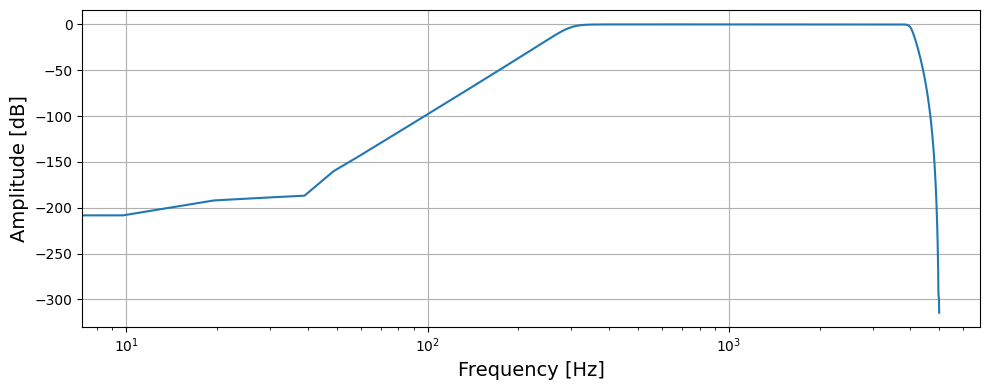

In [4]:
low = f_low  / (fs/2)
high = f_high  / (fs/2)

b,   a = butter(10, [low, high], btype='band')

# low = 0.5  / (fs/2)
high = 300  / (fs/2)
d,   c = butter(10, high, btype='low')

AP  = np.zeros_like(s)
LFP = np.zeros_like(s)
for i in range(s.shape[1]):
    AP[:,i]  = filtfilt(b,a, s[:,i])
    LFP[:,i] = filtfilt(d,c, s[:,i])


#--- Plot for AP bandpass filter (10kHz)

plt.rc('font', size=10)          # Controls default text size
plt.rc('axes', titlesize=14)     # Fontsize of the title
plt.rc('axes', labelsize=14)     # Fontsize of the x and y labels

fs = 10_000
fs = 10_000
f_low = 300
f_high = 4000
low = f_low  / (fs/2)
high = f_high  / (fs/2)

b,   a = butter(10, [low, high], btype='band')
w, h = freqz(b, a)#, 2**20)
f = w/(2*np.pi) *fs

fig = plt.figure(figsize=(10,4))
# plt.plot(f, 20 * np.log10(abs(h)))
plt.semilogx(f, 20 * np.log10(abs(h)))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True) 
# fig.suptitle('Digital Butterworth filter frequency response (fc= 300 - 4000Hz)')
plt.tight_layout()
plt.show()

### Plot

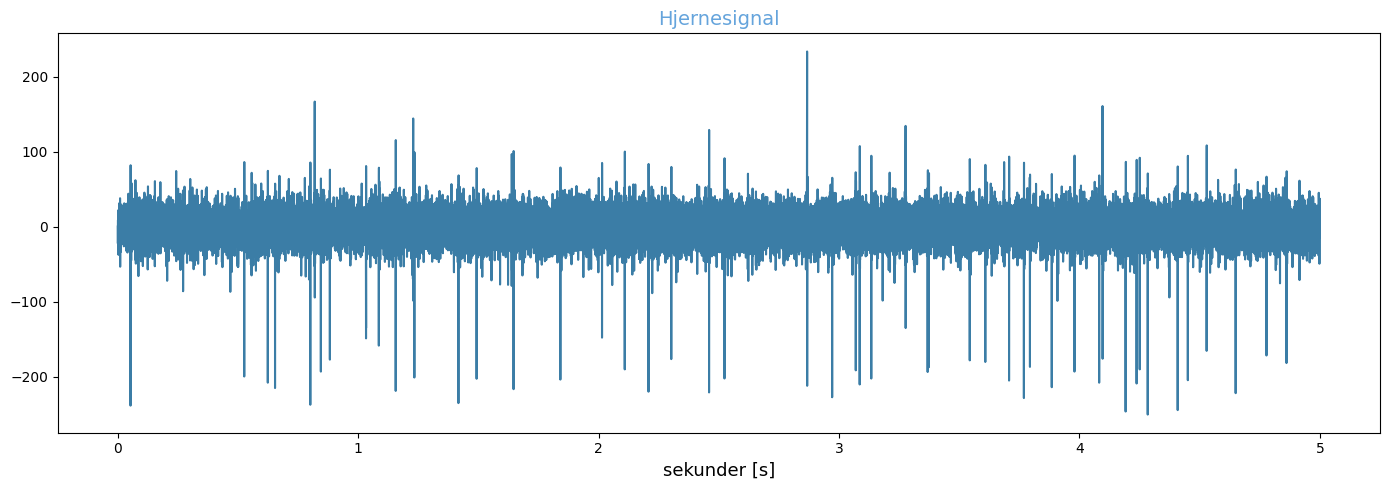

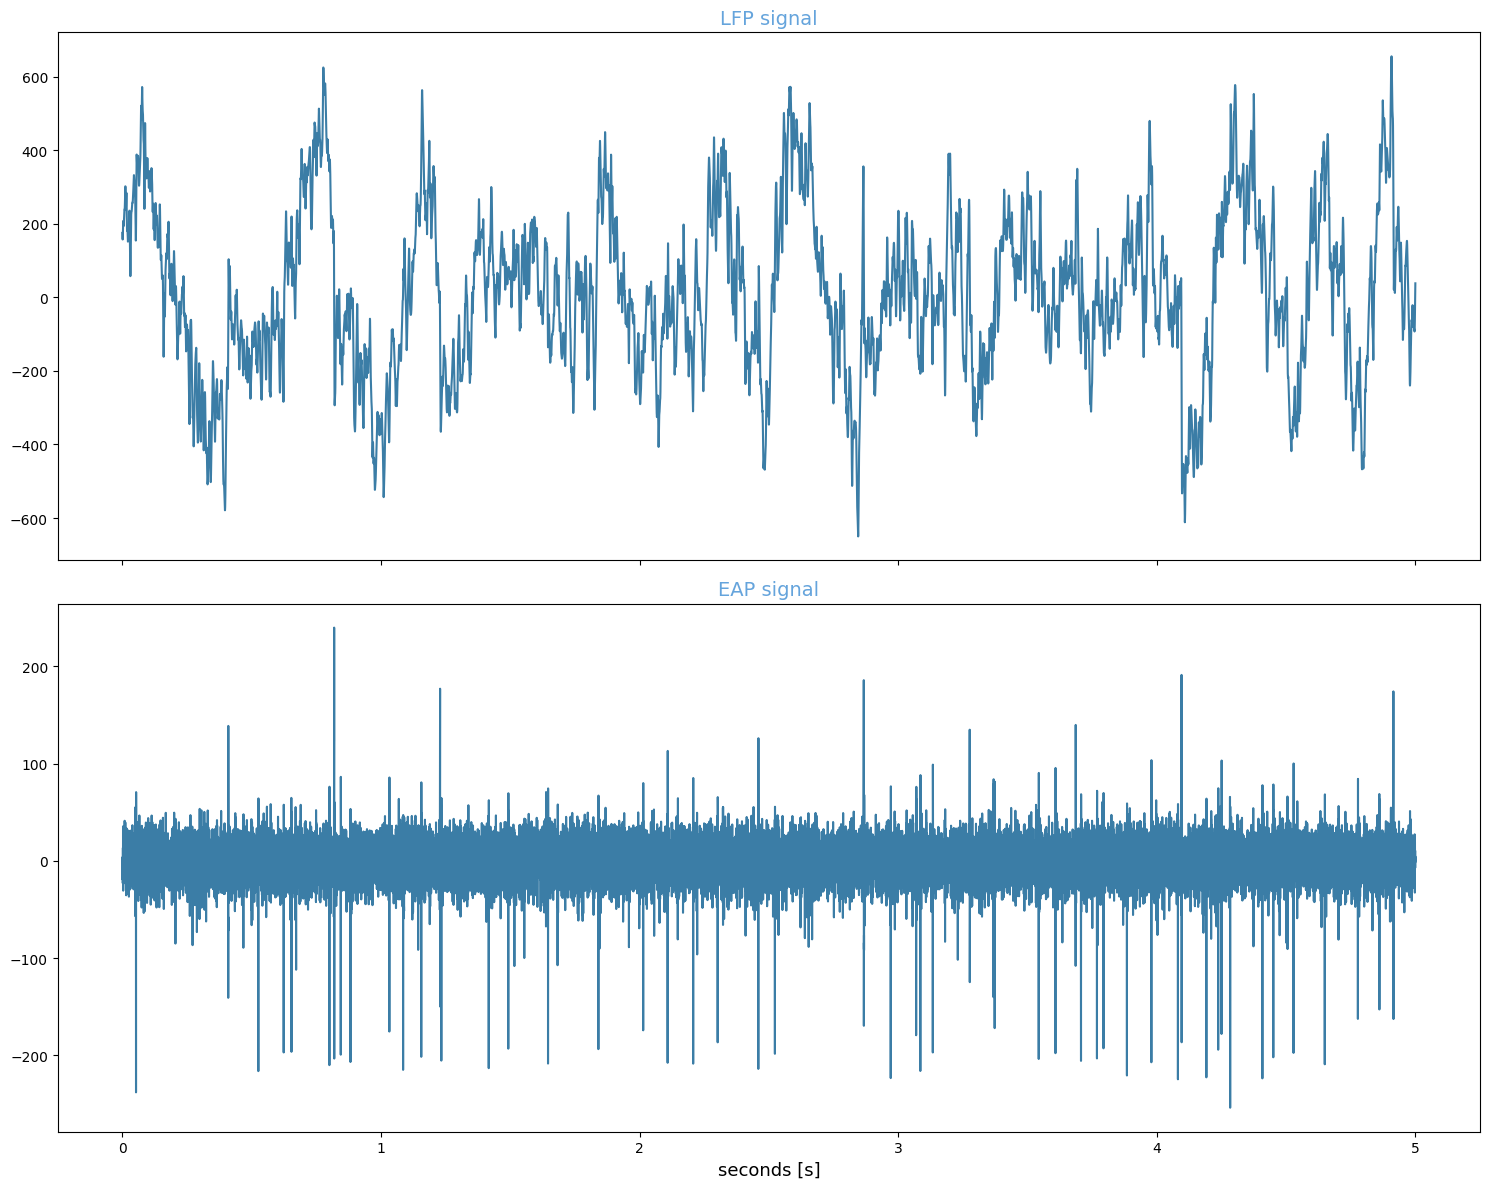

In [19]:
# plot for powerpoint
ts = np.linspace(0,t_max, int(s.shape[0])) # time 

plt.figure(figsize=(14, 5)) #, sharey='all'
plt.plot(ts, AP[:,i-4], color='#3B7DA6')
plt.title(f'Hjernesignal', color='#65A4DC', fontsize=14)
plt.xlabel('sekunder [s]', fontsize=13)
# plt.suptitle('Time domain plot', fontsize=16)
plt.tight_layout() 
plt.show()



# plot for background section
ts = np.linspace(0,t_max, int(s.shape[0])) # time 

fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True) #, sharey='all'
axs[0].set_title(f'LFP signal', color='#65A4DC', fontsize=14)
axs[0].plot(ts,  LFP[:,0], color='#3B7DA6')

axs[1].set_title(f'EAP signal', color='#65A4DC', fontsize=14)
axs[1].plot(ts, AP[:,0], color='#3B7DA6')

axs[1].set_xlabel('seconds [s]', fontsize=13)

# plt.suptitle('Time domain plot', fontsize=16)
plt.tight_layout() 
plt.show()

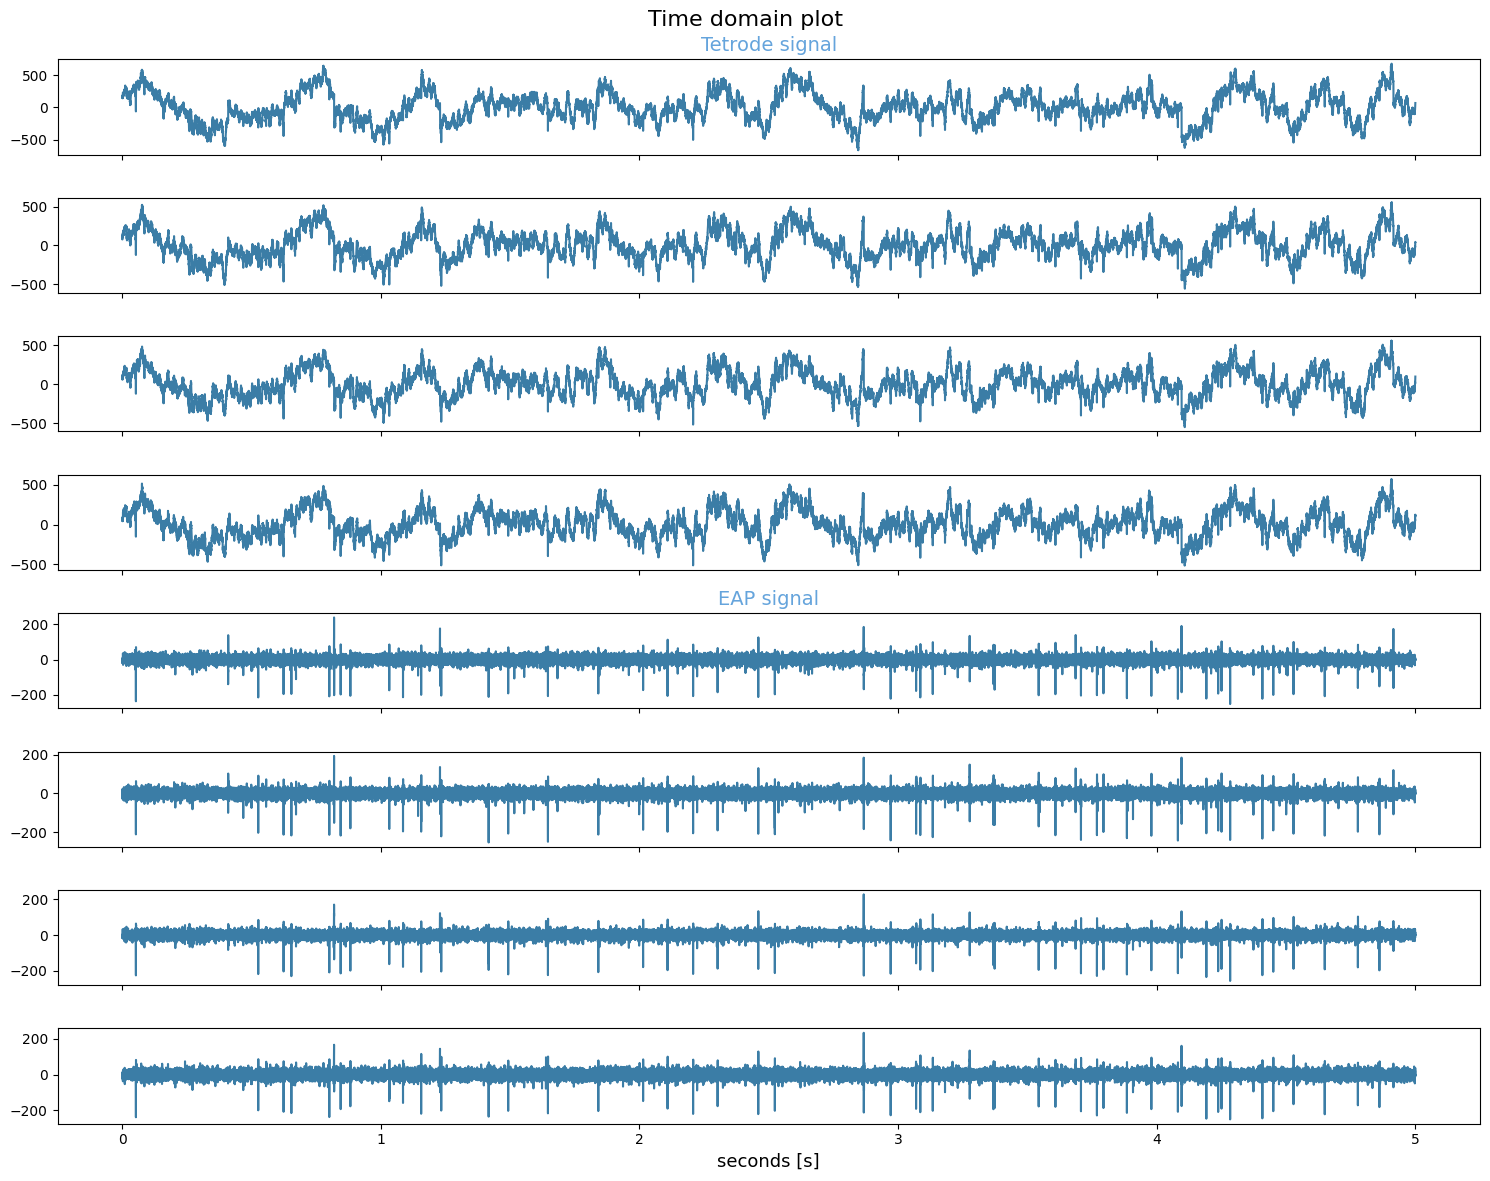

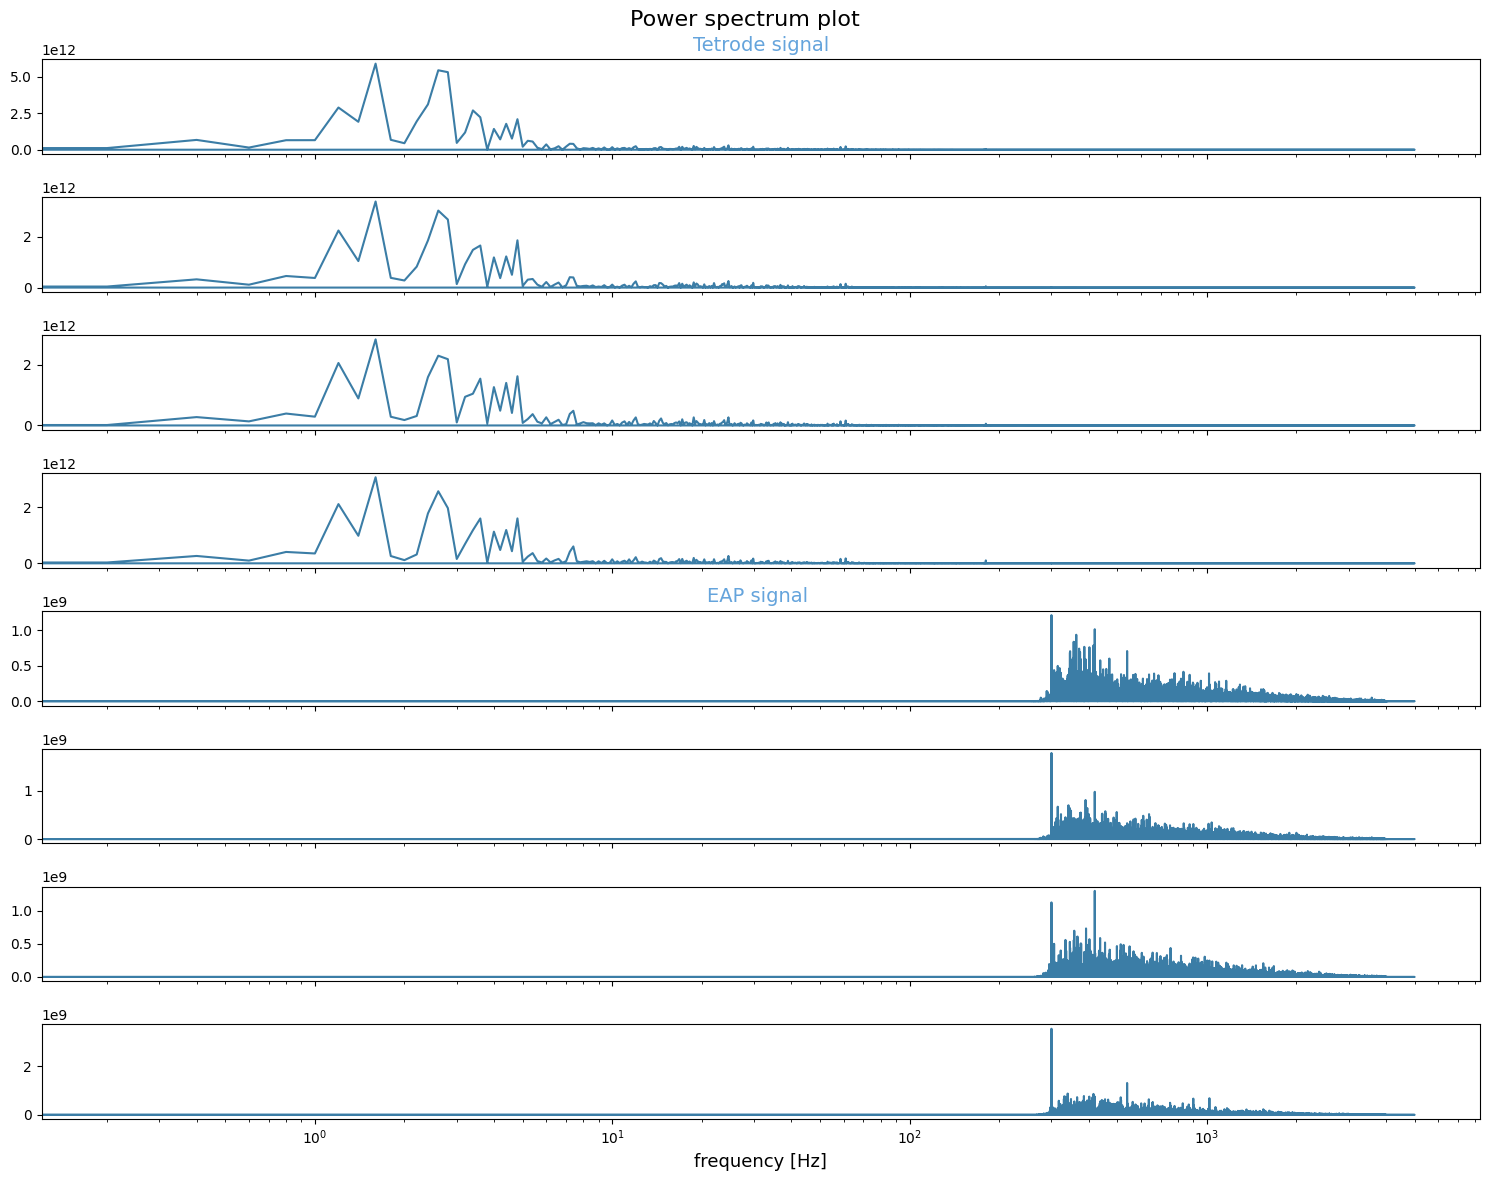

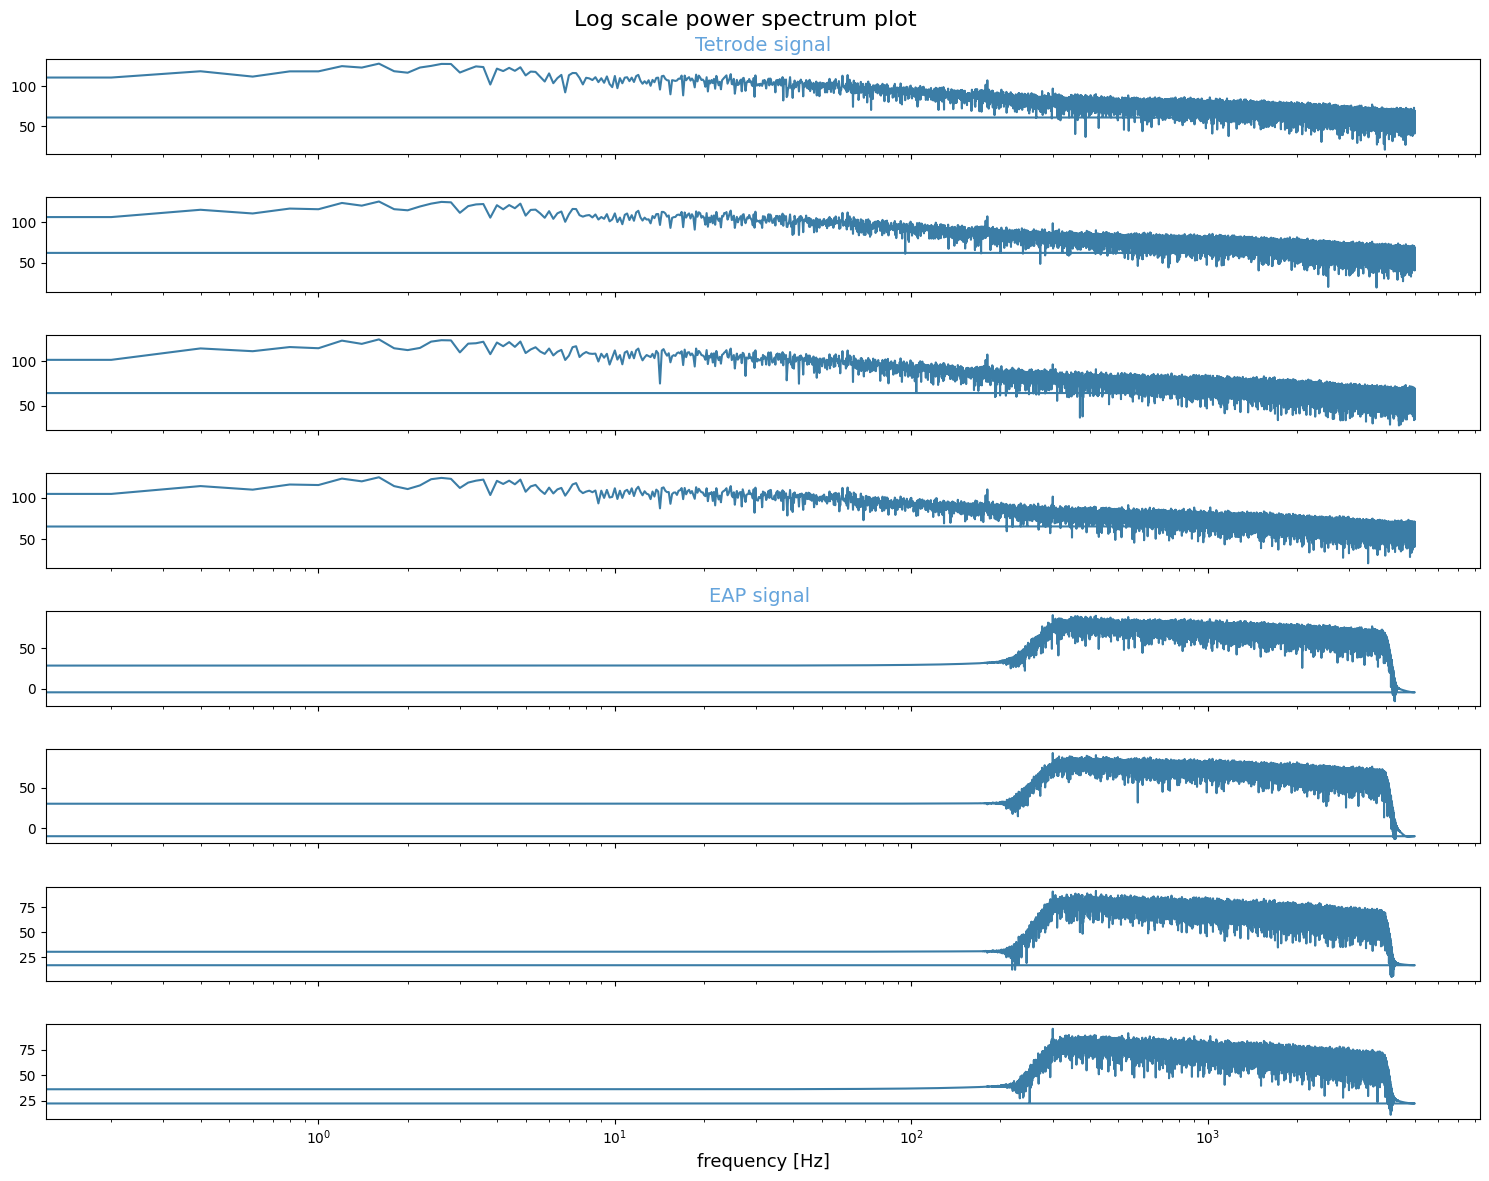

In [3]:
ts = np.linspace(0,t_max, int(s.shape[0])) # time 

fig, axs = plt.subplots(8, n_tet, figsize=(15, 12), sharex=True) #, sharey='all'
for i in range(8):
    if i <4:
        axs[i].plot(ts,  s[:,i], color='#3B7DA6')
    else: 
        axs[i].plot(ts, AP[:,i-4], color='#3B7DA6')

    if i == 0:
        axs[i].set_title(f'Tetrode signal', color='#65A4DC', fontsize=14)
    if i == 4:
        axs[i].set_title(f'EAP signal', color='#65A4DC', fontsize=14)
    if i == 7:
        axs[i].set_xlabel('seconds [s]', fontsize=13)
plt.suptitle('Time domain plot', fontsize=16)
plt.tight_layout() 
plt.show()

# plot the frequency components
fig, axs = plt.subplots(8, n_tet, figsize=(15, 12), sharex=True)#, sharey='col'
for i in range(8):
    if i<4:
        fft = np.fft.fft(s[:,i])
        P = np.abs(fft) ** 2
        P_db = 10 * np.log10(P)
        freqs = np.fft.fftfreq(len(s[:,i]), ts[1] - ts[0])

        axs[i].semilogx(freqs, P, color='#3B7DA6')
    else: 
        fft = np.fft.fft(AP[:,i-4])
        P = np.abs(fft) ** 2
        P_db = 10 * np.log10(P)
        freqs = np.fft.fftfreq(len(AP[:,i-4]), ts[1] - ts[0])

        axs[i].semilogx(freqs, P, color='#3B7DA6')

    if i == 0:
        axs[i].set_title(f'Tetrode signal', color='#65A4DC', fontsize=14)
    if i == 4:
        axs[i].set_title(f'EAP signal ', color='#65A4DC', fontsize=14)
    if i == 7:
        axs[i].set_xlabel('frequency [Hz]', fontsize=13)
plt.suptitle('Power spectrum plot', fontsize=16)
plt.tight_layout() 
plt.show()

# log scale 
fig, axs = plt.subplots(8, n_tet, figsize=(15, 12), sharex=True)#, sharey='col'
for i in range(8):
    if i<4:
        fft = np.fft.fft(s[:,i])
        P = np.abs(fft) ** 2
        P_db = 10 * np.log10(P)
        freqs = np.fft.fftfreq(len(s[:,i]), ts[1] - ts[0])

        axs[i].semilogx(freqs, P_db, color='#3B7DA6')
    else: 
        fft = np.fft.fft(AP[:,i-4])
        P = np.abs(fft) ** 2
        P_db = 10 * np.log10(P)
        freqs = np.fft.fftfreq(len(AP[:,i-4]), ts[1] - ts[0])

        axs[i].semilogx(freqs, P_db, color='#3B7DA6')
    if i == 0:
        axs[i].set_title(f'Tetrode signal', color='#65A4DC', fontsize=14)
    if i == 4:
        axs[i].set_title(f'EAP signal ', color='#65A4DC', fontsize=14)
    if i == 7:
        axs[i].set_xlabel('frequency [Hz]', fontsize=13)
plt.suptitle('Log scale power spectrum plot', fontsize=16)
plt.tight_layout() 
plt.show()


# # plot the frequency components AP
# fig, axs = plt.subplots(4, n_tet, figsize=(15, 7), sharey='col', sharex=True)
# for i in range(4):
#     fft = np.fft.fft(AP[:,i])
#     P = np.abs(fft) ** 2
#     P_db = 10 * np.log10(P)
#     freqs = np.fft.fftfreq(len(AP[:,i]), ts[1] - ts[0])

#     axs[i].semilogx(freqs, P, color='#3B7DA6')
#     # if i == 0:
#     #     axs[i].set_title(f'Tetrode ', color='#65A4DC')
#     if i == 3:
#         axs[i].set_xlabel('frequency [Hz]')
# plt.suptitle('Power Spectrum EAP signal', fontsize=16)
# plt.tight_layout() 
# plt.show()

# # log scale 
# fig, axs = plt.subplots(4, n_tet, figsize=(15, 7), sharey='col', sharex=True)
# for i in range(4):
#     fft = np.fft.fft(AP[:,i])
#     P = np.abs(fft) ** 2
#     P_db = 10 * np.log10(P)
#     freqs = np.fft.fftfreq(len(AP[:,i]), ts[1] - ts[0])

#     axs[i].semilogx(freqs, P_db, color='#3B7DA6')
#     # if i == 0:
#     #     axs[i].set_title(f'Tetrode ', color='#65A4DC')
#     if i == 3:
#         axs[i].set_xlabel('frequency [Hz]')
# plt.suptitle('Log scale power spectrum EAP signal', fontsize=16)
# plt.tight_layout() 
# plt.show()